In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_dir = "/Users/16508/Documents/DSC180_sleep_apnea_group2/actigraphy"

In [4]:
df = pd.read_csv(os.path.join(data_dir, 'hchs-sol-sueno-00163225.csv'))

In [5]:
print(df[df.wake == 1.0].activity.mean())
print(df[df.wake == 0].activity.mean())
print(df.activity.min(), df.activity.max())

190.2146755162242
0.5264302059496567
0 1300


In [6]:
# df.day = df.day.apply(lambda x: str(x))
# df.time = df.time.apply(lambda x: str(x))
# df.time = df.day + ':' + df.time
# df.time = pd.to_datetime(df['time'],format= '%d:%H:%M:%S').dt.time

In [7]:
def seconds(time):
    time = time.split(':')
    return int(time[0]) * 3600 + int(time[1]) * 60 + int(time[2])

In [8]:
df['seconds'] = (df.day - 1) * 86400 + df.time.apply(seconds)

In [55]:
df = df.dropna(subset=['wake', 'seconds', 'activity'])

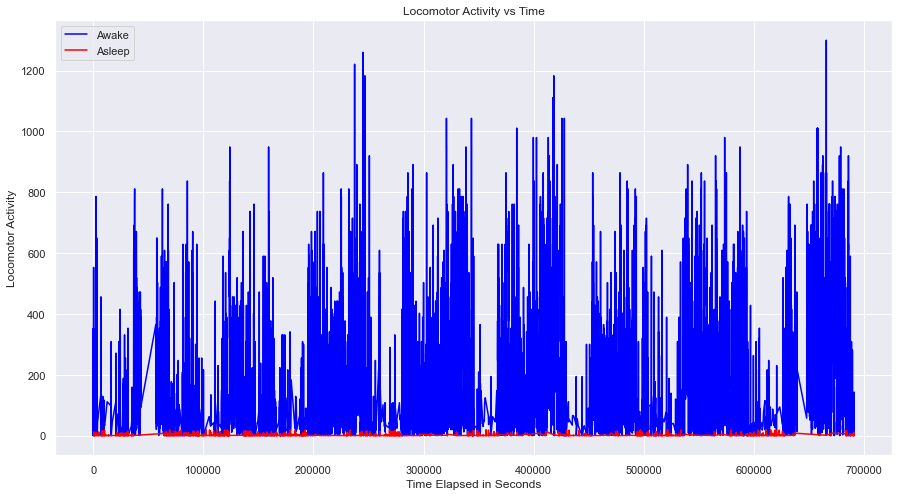

In [56]:
sns.set(rc={"figure.figsize":(15, 8)})
fig1 = sns.lineplot(x='seconds', y='activity', data=df[df.wake == 1.0], color='blue')
fig2 = sns.lineplot(x='seconds', y='activity', data=df[df.wake == 0], color='red')
fig1.set(xlabel='Time Elapsed in Seconds',
         ylabel='Locomotor Activity',
         title='Locomotor Activity vs Time')
plt.legend(labels = ['Awake', 'Asleep'])

plt.show()

In [57]:
print(len(df[df.wake == 1.0]))
print(len(df[df.wake == 0]))

13560
8740


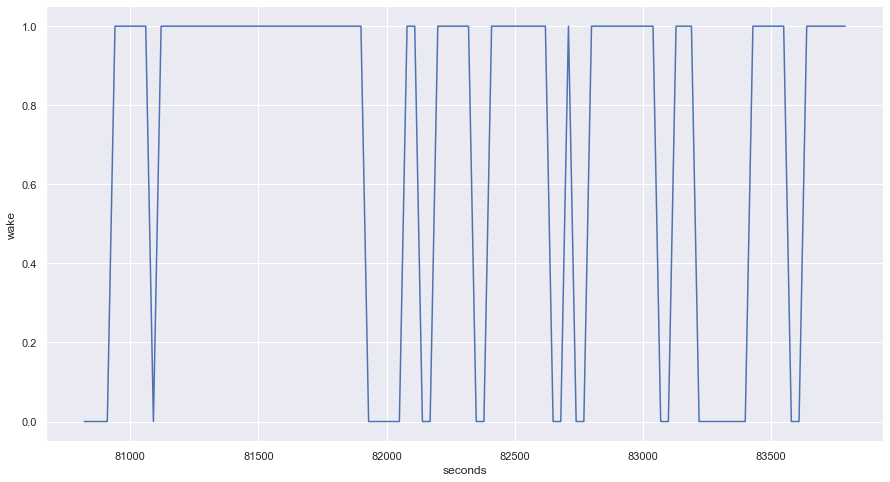

In [68]:
fig5 = sns.lineplot(x='seconds', y='wake', data=df.iloc[800:900])

In [45]:
df2 = pd.read_csv(os.path.join(data_dir, 'hchs-sol-sueno-00238589.csv'))

In [46]:
df2

,pid,sawa2,line,offwrist,activity,marker,whitelight,redlight,greenlight,bluelight,wake,interval,starth,day,dayofweek,validday,time
0,238589,1,1,0,NaN,0,NaN,NaN,NaN,NaN,NaN,ACTIVE,0,1,4,1,14:06:00
1,238589,1,2,0,NaN,0,NaN,NaN,NaN,NaN,NaN,ACTIVE,0,1,4,1,14:06:30
2,238589,1,3,0,NaN,0,NaN,NaN,NaN,NaN,NaN,ACTIVE,0,1,4,1,14:07:00
3,238589,1,4,0,NaN,0,NaN,NaN,NaN,NaN,NaN,ACTIVE,0,1,4,1,14:07:30
4,238589,1,5,0,234.0,0,311.93,42.2000,24.6000,3.0700,NaN,ACTIVE,0,1,4,1,14:08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19756,238589,1,19757,0,0.0,0,0.28,0.0256,0.0251,0.0023,NaN,ACTIVE,0,7,4,1,10:44:00
19757,238589,1,19758,0,95.0,0,25.81,3.3500,2.0800,0.1690,NaN,ACTIVE,0,7,4,1,10:44:30
19758,238589,1,19759,0,NaN,0,NaN,NaN,NaN,NaN,NaN,ACTIVE,0,7,4,1,10:45:00
19759,238589,1,19760,0,NaN,0,NaN,NaN,NaN,NaN,NaN,ACTIVE,0,7,4,1,10:45:30
